In [38]:
import os
import pprint
from igor2.packed import load as loadpxp

import matplotlib.pylab as plt
import numpy as np
import statistics
from scipy import stats

## try with one file

In [2]:
datafile = loadpxp('D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp')

In [4]:
def find_diff(recording):

    #find baseline
    recording_baseline = recording[52000:58000]
    avg_baseline = statistics.mean(recording_baseline)

    #find minimum
    recording_roi = recording[60200:62000]
    min = np.min(recording_roi)

    #compute diff
    diff =  min - avg_baseline

    #print("baseline : ",avg_baseline)
    #print("min : ",min)
    #print("diff : ",diff)

    return diff

In [5]:
def get_recordings(datafile):
    try:
        DATA = []
        i = 0
        while True:
            key = b'RecordA%i' % i
            if key in datafile[1]['root']:
                DATA.append(datafile[1]['root'][key].wave['wave']['wData'])
                i += 1
            else:
                break
        recordings = np.array(DATA)
        #print('OK Recordings were loaded')
        return recordings
    except Exception as e:
        print(f'Recordings were not loaded: {e}')
        return -1

In [10]:
recordings = get_recordings(datafile)

diffs = []
for recording in recordings:
    diffs.append(find_diff(recording))

NameError: name 'datafile' is not defined

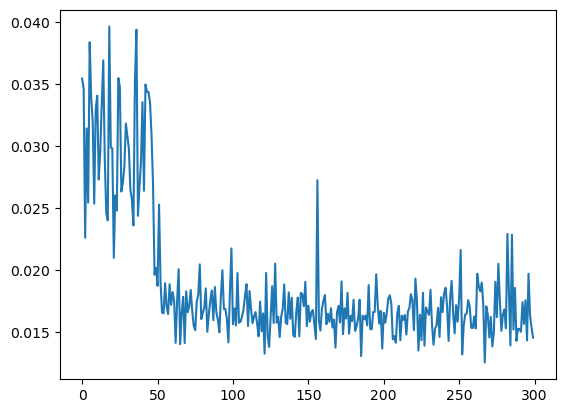

In [23]:
plt.plot(diffs)

## try for all files

In [6]:
def find_nm_files(root_folder):
    nm_paths = []
    
    # Walk through all directories and files in the root_folder
    for folder, _, files in os.walk(root_folder):
        # Check each file in the current directory
        for file in files:

            # Skip files with specific extensions
            if any(ext in file for ext in ['HDF5', 'txt', 'pdf', 'log', 'xlsx']):
                break
            # Construct the full path of the file
            file_path = os.path.join(folder, file)
            normalized_path = os.path.normpath(file_path)
            forward_slash_path = normalized_path.replace("\\", "/")
            nm_paths.append(forward_slash_path)
            #print('-', file)

    return nm_paths

In [7]:
files = find_nm_files('D:\Internship_Rebola_ICM\RAW_DATA_TO_ANALYSE_WASHOUT')
files

['D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp',
 'D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm21Jun2024c0/nm21Jun2024c0_000.pxp',
 'D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c1/nm28Jun2024c1_000.pxp',
 'D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c0/nm28Jun2024c0_000.pxp']

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp


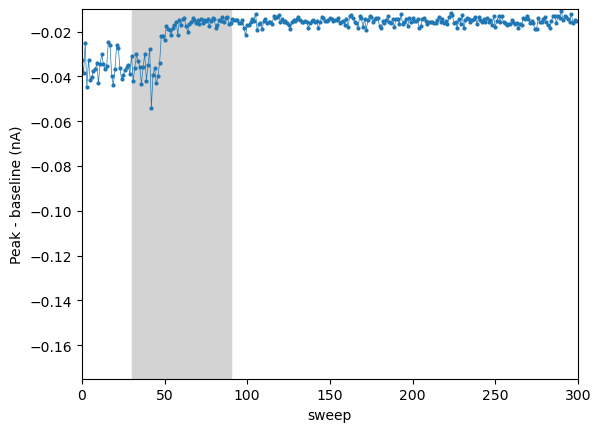

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm21Jun2024c0/nm21Jun2024c0_000.pxp


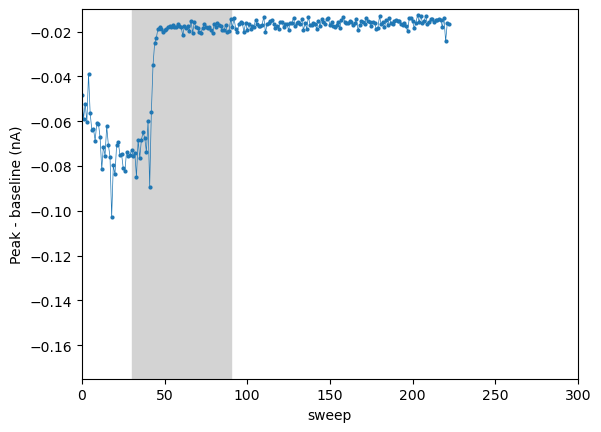

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c1/nm28Jun2024c1_000.pxp


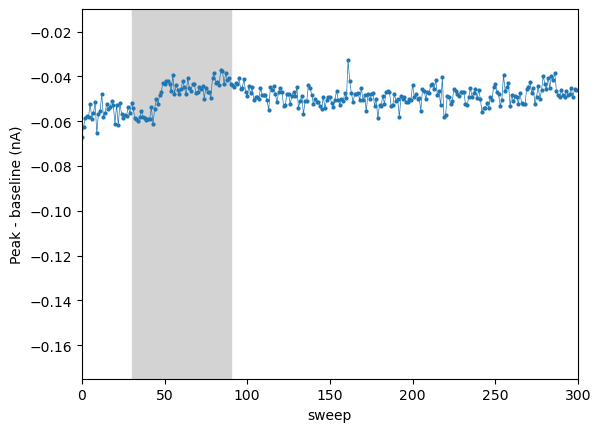

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c0/nm28Jun2024c0_000.pxp


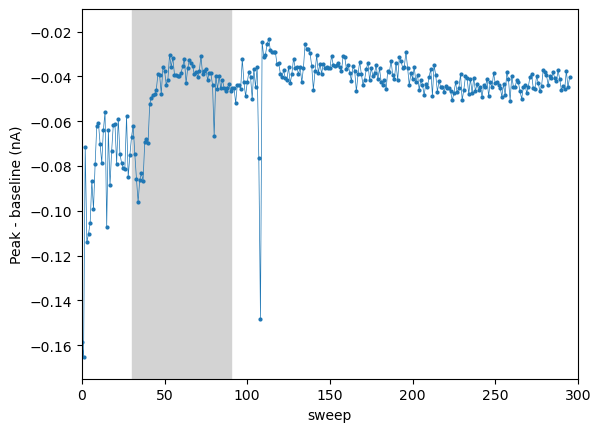

In [13]:
for file in files:
    try:
        print(file)
        datafile = loadpxp(file)
        recordings = get_recordings(datafile)

        diffs = []
        for recording in recordings:
            diff = find_diff(recording)
            if diff>-0.17 :
                diffs.append(diff)

        fig, ax = plt.subplots()
        ax.plot(diffs, marker = "o", linewidth = 0.5, markersize=2 )
        ax.set_xlim(0,300)
        ax.set_ylim(-0.175, -0.01)
        ax.set_ylabel("Peak - baseline (nA)")
        ax.set_xlabel("sweep")

        #plt.axvline(x=30, color = "lightgrey")
        #plt.axvline(x=90, color = "lightgrey")
        ax.axvspan(30, 90, color='lightgrey')
        
        
        plt.show()

    except Exception as e:
        print(f"Error analysing this file : {e}")

In [36]:
def get_batches_rec(diffs):
    batch_size = 6
    means = []
    sem = []
    for i in range(0, len(diffs), batch_size):
        means.append(np.mean(diffs[i:i+batch_size]))
        sem.append(stats.sem(diffs[i:i+batch_size]))
    return means, sem
            

In [67]:
def get_diffs(recordings):
    diffs = []
    for recording in recordings:
        diff = find_diff(recording)
        if diff>-0.17 :
            diffs.append(diff)
    return diffs

In [98]:
def get_diffs2(recordings):
    diffs = []
    for recording in recordings:
        diff = find_diff2(recording)
        if diff<0.1:
            diffs.append(diff)
    return diffs

In [25]:
datafile = loadpxp('D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp')
recordings = get_recordings(datafile)
diffs = get_diffs(recordings)

In [22]:
len(recordings)

300

In [39]:
get_batches_rec(diffs)

([-0.035940124206201705,
  -0.037814690692653044,
  -0.031290800736340746,
  -0.035080881599855916,
  -0.037935870572192686,
  -0.03470075904621341,
  -0.03564916028370776,
  -0.04121602656206746,
  -0.020652520959294974,
  -0.0181596940320105,
  -0.016615644020163706,
  -0.01536543810473748,
  -0.015379785064405441,
  -0.0157698896803537,
  -0.014799699685170494,
  -0.015171754331945427,
  -0.01745944853950929,
  -0.01559577642589278,
  -0.016125486500674843,
  -0.01425780725068345,
  -0.01584488022492088,
  -0.015324043080836042,
  -0.015861481172240847,
  -0.0159647183788973,
  -0.014834386391719016,
  -0.014576159213525458,
  -0.01609969059313757,
  -0.014977766414491984,
  -0.015553504773698079,
  -0.014018435002368107,
  -0.015944664823594645,
  -0.015533594350760578,
  -0.015554005656346737,
  -0.014770254435008906,
  -0.016069619226076744,
  -0.01572865559957833,
  -0.01525243352150975,
  -0.014684441073090493,
  -0.015164473488095166,
  -0.014964904221935763,
  -0.014699503579

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp


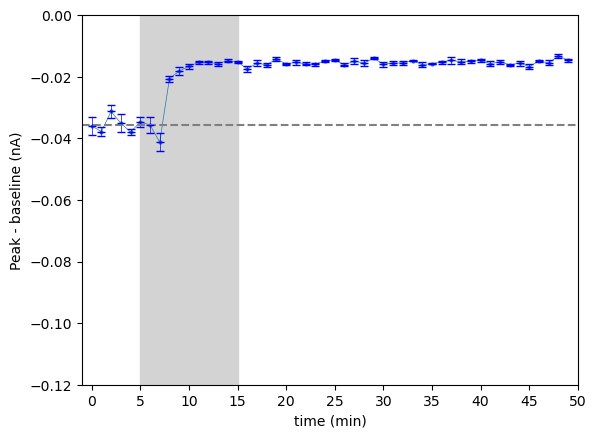

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm21Jun2024c0/nm21Jun2024c0_000.pxp


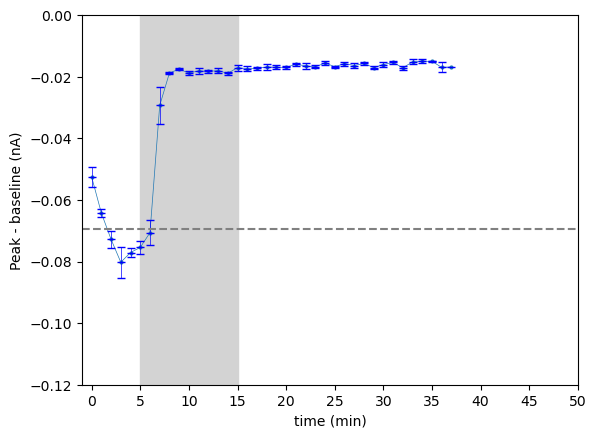

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c1/nm28Jun2024c1_000.pxp


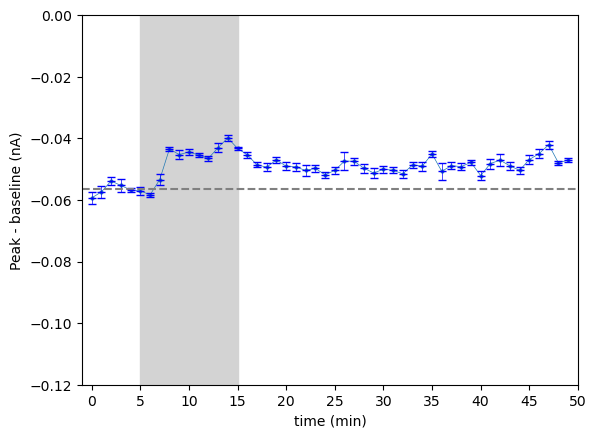

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c0/nm28Jun2024c0_000.pxp


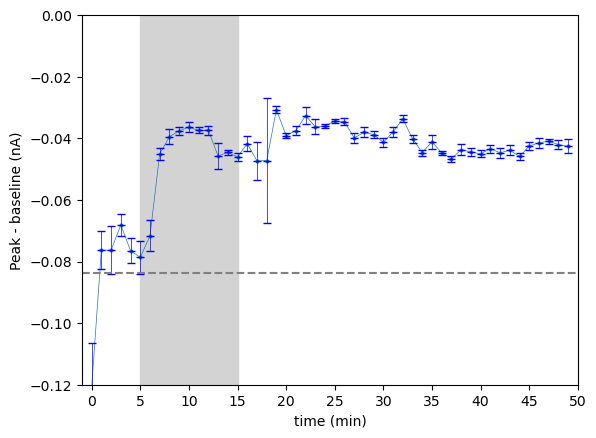

In [56]:
for file in files:
    try:
        print(file)
        datafile = loadpxp(file)
        recordings = get_recordings(datafile)
        diffs = get_diffs(recordings)
        batches_m, batches_std = get_batches_rec(diffs)

        fig, ax = plt.subplots()
        
        ax.plot(batches_m, marker = "o", linewidth = 0.5, markersize=2 )
        
        ax.errorbar(range(len(batches_m)), batches_m, yerr=batches_std, linestyle='None', marker='_', color='blue', capsize=3, linewidth = 0.5)

        ax.set_xlim(-1,50)
        ax.set_ylim(-0.14, 0)
        ax.set_ylabel("Peak - baseline (nA)")
        ax.set_xlabel("time (min)")
        ax.axvspan(5, 15, color='lightgrey')
        ax.set_xticks(np.arange(0, 51, 5))
        plt.axhline(np.mean(batches_m[0:5]), color = "grey", linestyle = "--")
  
        plt.show()

    except Exception as e:
        print(f"Error analysing this file : {e}")

In [58]:
def find_diff2(recording):

    #find baseline
    recording_baseline = recording[52000:58000]
    avg_baseline = statistics.mean(recording_baseline)

    #find minimum
    recording_roi = recording[60200:62000]
    min = np.min(recording_roi)

    #compute diff
    diff =  avg_baseline - min

    #print("baseline : ",avg_baseline)
    #print("min : ",min)
    #print("diff : ",diff)

    return diff

In [85]:
def norm_batches(diffs):
    batch_size = 6
    means_norm = []
    for i in range(0, len(diffs), batch_size):
        batch = diffs[i:i+batch_size]
        means_norm.append((np.mean(batch) - np.min(batch))/ ((np.max(batch) - np.min(batch)))               
    return means_norm

In [103]:
def norm_batches2(diffs):
    batch_size = 6
    means_norm = []
    
    baseline_m = np.mean(diffs[0:30])
    baseline_std = np.std(diffs[0:30])
    
    for i in range(0, len(diffs), batch_size):
        batch = diffs[i:i+batch_size]
        means_norm.append((np.mean(batch) - baseline_m) / baseline_std)      
    return means_norm

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm20Jun2024c0/nm20Jun2024c0_002.pxp
[0.01572865559957833, 0.01525243352150975]


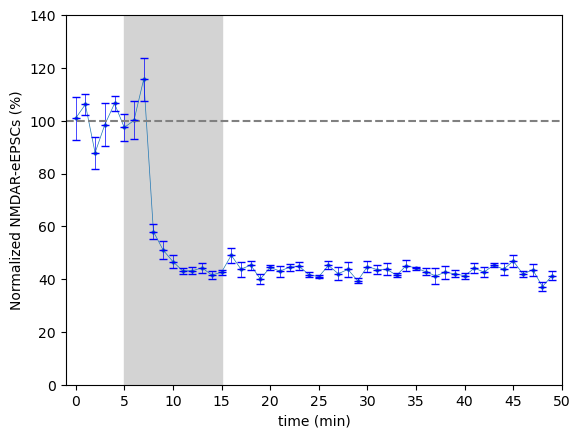

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm21Jun2024c0/nm21Jun2024c0_000.pxp
[0.014851183312475216, 0.017343839182681214]


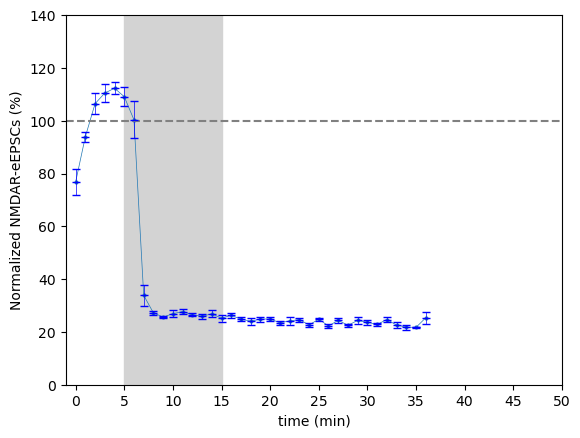

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c1/nm28Jun2024c1_000.pxp
[0.04504813876547711, 0.050712540809573575]


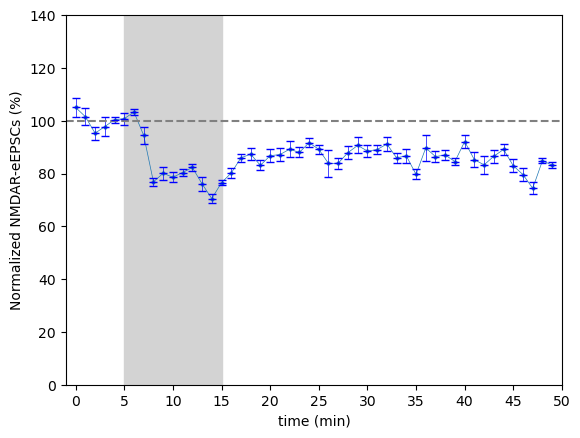

D:/Internship_Rebola_ICM/RAW_DATA_TO_ANALYSE_WASHOUT/nm28Jun2024c0/nm28Jun2024c0_000.pxp
[0.0452684937360753, 0.04667631795252164]


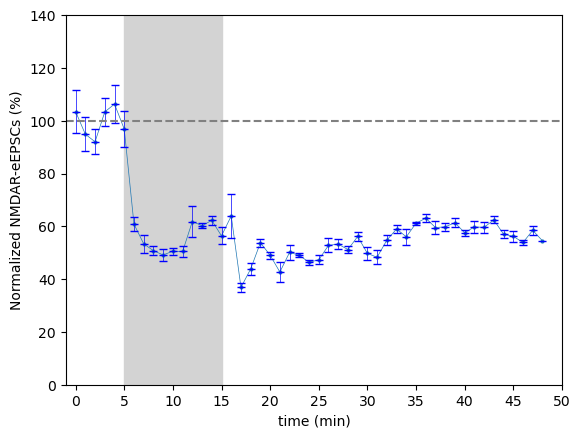

In [101]:
for file in files:
    try:
        print(file)
        datafile = loadpxp(file)
        recordings = get_recordings(datafile)
        diffs = get_diffs2(recordings)
        batches_m, batches_std = get_batches_rec(diffs)
        print(batches_m[35:37])

        # Calculate baseline mean and standard deviation
        baseline_m = np.mean(batches_m[0:5])
        baseline_std = np.std(batches_m[0:5])

        # Normalization by baseline
        batches_m_norm = (batches_m / baseline_m) * 100  # Baseline at 100%
        batches_std_norm = (batches_std / baseline_m) * 100  # Adjust standard deviation normalization ????

        fig, ax = plt.subplots()
        ax.plot(batches_m_norm, marker="o", linewidth=0.5, markersize=2)
        ax.errorbar(range(len(batches_m_norm)), batches_m_norm, yerr=batches_std_norm, linestyle='None', marker='_', color='blue', capsize=3, linewidth = 0.5)
        ax.set_xlim(-1, 50 )
        ax.set_ylim( 0, 140)
        ax.set_ylabel("Normalized NMDAR-eEPSCs (%)")
        ax.set_xlabel("time (min)")
        ax.set_xticks(np.arange(0, 51, 5))
        ax.axvspan(5, 15, color='lightgrey')
        plt.axhline(100, color="grey", linestyle="--")

        plt.show()

    except Exception as e:
        print(f"Error analysing this file: {e}")
